,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


# Linear Regression
  mae  = 51.341
  rmse = 62.621
  r2   = 0.231


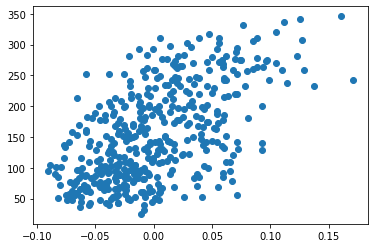

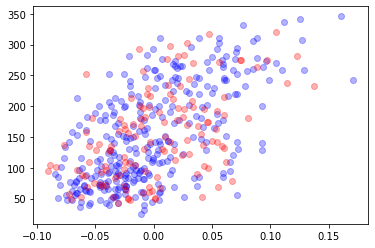

In [28]:
# 1번 : Linear Regression
# Linear Regression을 위한 라이브러리 로드
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 당뇨병 데이터셋 로드
diabetes = load_diabetes()

# 당뇨병 데이터셋을 df_diabetes 이름의 DataFrame으로 변환
df_diabetes = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df_diabetes['target'] = diabetes.target
display(df_diabetes)

# 당뇨병 데이터 중 bmi와 target 간의 관계를 시각화
x_sample,y_sample = df_diabetes['bmi'], df_diabetes['target']

fig, ax = plt.subplots()
ax.scatter(x_sample, y_sample)
fig.savefig('파일1 이름')

# bmi 데이터와 target을 Linear Regression으로 학습
X_trn, X_test, y_trn, y_test = train_test_split(x_sample, y_sample.values.reshape(-1, 1), 
                                                test_size=0.3, random_state=0)

lm = LinearRegression()
model = lm.fit(X_trn.values.reshape(-1,1),y_trn)
pred = model.predict(X_test.values.reshape(-1,1))
new_y = model.predict(X_test.values.reshape(-1,1))
new_x = np.arange(-0.10,0.2,0.01)

fig, ax = plt.subplots()
ax.scatter(X_trn, y_trn, c="b", alpha=0.3)
ax.scatter(X_test, y_test, c="r", alpha=0.3)
#ax.plot(new_x, new_y, c="k")
fig.savefig('파일2 이름')

# Linear Regression을 MAE, RMSE, R2 score로 평가
mae = mean_absolute_error(y_test,pred)
r2 = model.score(X_test.values.reshape(-1,1),y_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test,pred)

print("# Linear Regression")
print(f"  mae  = {mae:0.3f}")
print(f"  rmse = {rmse:0.3f}")
print(f"  r2   = {r2:0.3f}")


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


# Linear Regression
  mae  = 51.341
  rmse = 62.621
  r2   = 0.231


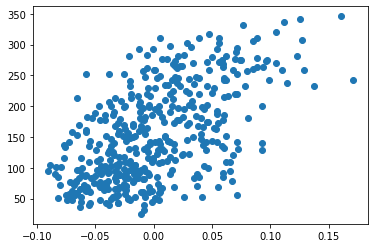

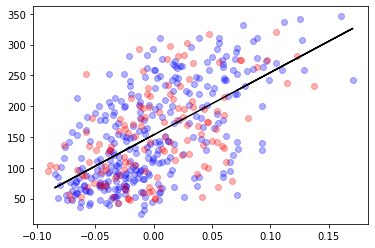

In [1]:
# Linear Regression을 위한 라이브러리 로드
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# 당뇨병 데이터셋 로드
diabetes = load_diabetes()


# 당뇨병 데이터셋을 df_diabetes 이름의 DataFrame으로 변환
df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_diabetes['target'] = diabetes.target
display(df_diabetes)


# 당뇨병 데이터 중 bmi와 target 간의 관계를 시각화
x_sample = df_diabetes[['bmi']]
y_sample = df_diabetes['target'].values


fig, ax = plt.subplots()
ax.scatter(x_sample, y_sample)

# bmi 데이터와 target을 Linear Regression으로 학습
X_trn, X_test, y_trn, y_test = train_test_split(x_sample, y_sample.reshape(-1, 1), 
                                                test_size=0.3, random_state=0)
clf = LinearRegression()
clf.fit(X_trn, y_trn)
y_pred = clf.predict(X_test)

new_x = X_trn.values.flatten()
new_y = X_trn.values.flatten() * clf.coef_[0] + clf.intercept_


fig, ax = plt.subplots()
ax.scatter(X_trn, y_trn, c="b", alpha=0.3)
ax.scatter(X_test, y_test, c="r", alpha=0.3)
ax.plot(new_x, new_y, c="k")

# Linear Regression을 MAE, RMSE, R2 score로 평가
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)
print("# Linear Regression")
print(f"  mae  = {mae:0.3f}")
print(f"  rmse = {rmse:0.3f}")
print(f"  r2   = {r2:0.3f}")

In [12]:
y_sample
#print(y_sample.reshape(-1, 1))

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

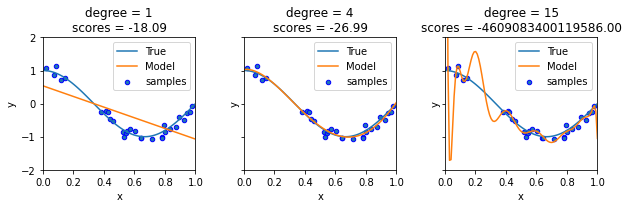

In [35]:
# 2번 : Polynomial Regression
# code from 1번

# Polynomial Regression을 위한 라이브러리 로드
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# 실험 데이터 생성
def true_func(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
X_trn = np.sort(np.random.rand(n_samples))
y_trn = true_func(X_trn) + np.random.randn(n_samples) * 0.1
X_test = np.linspace(0, 1, 100)

# Polynomial 모델의 degree
degrees = [1, 4, 15]

# Polynomial Regression 학습 후 모델의 예측값과 교차 검증 점수의 평균을 반환
def gen_prediction(X_trn, X_test, y_trn, degree):
    poly_features = PolynomialFeatures(degree = degree, include_bias= False)
    X_poly = poly_features.fit_transform(X_trn)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y_trn)
    X_new_poly = poly_features.transform(X_test)
    y_pred = lin_reg.predict(X_new_poly)
    scores = cross_val_score(lin_reg,X_poly, y_trn)
    return y_pred, scores.mean()

# 결과 시각화
fig, axs = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
for i, (d, ax) in enumerate(zip(degrees, axs)):
    ax.plot(X_test, true_func(X_test), label="True")
    ax.scatter(X_trn, y_trn, ec="b", s=20, label="samples")
    y_pred, scores = gen_prediction(X_trn.reshape(-1,1), X_test.reshape(-1,1), y_trn, d)
    ax.plot(X_test, y_pred, label="Model")  
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(f"degree = {d}\nscores = {scores:0.2f}")
    ax.set_xlim(0, 1)
    ax.set_ylim(-2, 2)
    ax.legend()

fig.tight_layout()
fig.savefig("파일 이름")

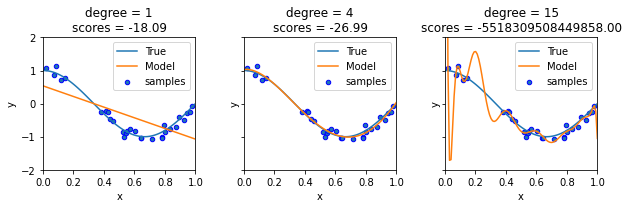

In [37]:
# code from 1번


# Polynomial Regression을 위한 라이브러리 로드
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


# 실험 데이터 생성
def true_func(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)
n_samples = 30
X_trn = np.sort(np.random.rand(n_samples))
y_trn = true_func(X_trn) + np.random.randn(n_samples) * 0.1
X_test = np.linspace(0, 1, 100)


# Polynomial 모델의 degree
degrees = [1, 4, 15]


# Polynomial Regression 학습 후 모델의 예측값과 교차 검증 점수의 평균을 반환
def gen_prediction(X_trn, X_test, y_trn, degree):


    pipeline = Pipeline([
        ('poly',PolynomialFeatures(degree = degree)),
        ('linear_reg', LinearRegression())
    ])
    
    pipeline.fit(X_trn.reshape(-1, 1), y_trn)


    y_pred = pipeline.predict(X_test.reshape(-1, 1))
    scores = cross_val_score(pipeline, X_trn.reshape(-1, 1), y_trn) 
                     
    return y_pred, scores.mean()


# 결과 시각화
fig, axs = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
for i, (d, ax) in enumerate(zip(degrees, axs)):
    ax.plot(X_test, true_func(X_test), label="True")
    ax.scatter(X_trn, y_trn, ec="b", s=20, label="samples")
    y_pred, scores = gen_prediction(X_trn, X_test, y_trn, d)
    ax.plot(X_test, y_pred, label="Model")  
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(f"degree = {d}\nscores = {scores:0.2f}")
    ax.set_xlim(0, 1)
    ax.set_ylim(-2, 2)
    ax.legend()


fig.tight_layout()


In [41]:
# 3번 : Polynomial Regression (2)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
X_trn, X_test, y_trn, y_test = train_test_split(diabetes["data"], diabetes["target"], 
             
                                   test_size=0.3, random_state=0)
# 학습 결과 평가
def get_metrics(y_test, y_pred):
    d = y_test - y_pred
    mae = np.mean(abs(d))
    rmse = np.sqrt(np.mean(d**2))
    r2 = 1-(sum(d**2) / sum((y_test - np.mean(y_test)) ** 2))
    return mae, rmse, r2

# 주어진 데이터셋과 degree에 대해서 Polynomial Regression 수행
def gen_poly_prediction(X_trn, X_test, y_trn, degree):
    pipeline = Pipeline([
        ('poly',PolynomialFeatures(degree = degree)),
        ('linear_reg', LinearRegression())
    ])
    pipeline.fit(X_trn, y_trn)
    y_pred = pipeline.predict(X_test)
    return y_pred

# 학습 및 결과 출력
degrees = [1, 2, 3]

for d in degrees:
    y_pred = gen_poly_prediction(X_trn, X_test, y_trn, d)

    mae_lr, rmse_lr, r2_lr = get_metrics(y_test, y_pred)

    print(f"# Linear Regression (degree = {d})")
    print(f"  mae  = {mae_lr:0.3f}")
    print(f"  rmse = {rmse_lr:0.3f}")
    print(f"  r2   = {r2_lr:0.3f}")

# Linear Regression (degree = 1)
  mae  = 44.618
  rmse = 55.652
  r2   = 0.393
# Linear Regression (degree = 2)
  mae  = 49.987
  rmse = 62.866
  r2   = 0.225
# Linear Regression (degree = 3)
  mae  = 372.286
  rmse = 991.457
  r2   = -191.686


In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


X_trn, X_test, y_trn, y_test = train_test_split(diabetes["data"], diabetes["target"], 
             
                                   test_size=0.3, random_state=0)


# 학습 결과 평가
def get_metrics(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    r2 = r2_score(y_test, y_pred)
    
    return mae, rmse, r2


# 주어진 데이터셋과 degree에 대해서 Polynomial Regression 수행
def gen_poly_prediction(X_trn, X_test, y_trn, degree):
    pipeline = Pipeline([
        ('poly',PolynomialFeatures(degree = degree)),
        ('linear_reg', LinearRegression())
    ])
    
    pipeline.fit(X_trn, y_trn)


    y_pred = pipeline.predict(X_test)
    
    return y_pred


# 학습 및 결과 출력
degrees = [1, 2, 3]


for d in degrees:
    y_pred = gen_poly_prediction(X_trn, X_test, y_trn, d)


    mae_lr, rmse_lr, r2_lr = get_metrics(y_test, y_pred)


    print(f"# Linear Regression (degree = {d})")
    print(f"  mae  = {mae_lr:0.3f}")
    print(f"  rmse = {rmse_lr:0.3f}")
    print(f"  r2   = {r2_lr:0.3f}")

# Linear Regression (degree = 1)
  mae  = 44.618
  rmse = 55.652
  r2   = 0.393
# Linear Regression (degree = 2)
  mae  = 49.987
  rmse = 62.866
  r2   = 0.225
# Linear Regression (degree = 3)
  mae  = 372.286
  rmse = 991.457
  r2   = -191.686


ValueError: ignored

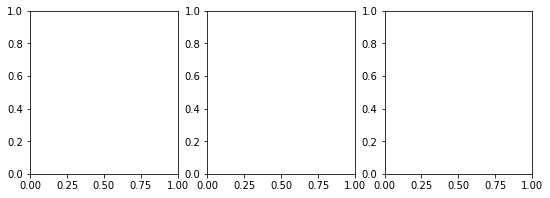

In [61]:
# 4번 : Regularization - Ridge, Lasso
#훈련 데이터 예측 성능은 좋지만 테스트 데이터 예측력이 좋지 못한 경우 과적합이 그 이유일 수 있습니다.
#규제(Regularization) 방법은 모델 계수가 지나치게 커지는 것을 막아주어 과적합을 방지합니다.
#규제를 적용한 회귀 모델인 Ridge와 Lasso를 사용하여 당뇨병 데이터 회귀문제를 풀어보세요.
# Ridge, Lasso 라이브러리 로드
from sklearn.linear_model import Ridge, Lasso

# 데이터셋 로드
X = diabetes["data"]
y = diabetes["target"]
X_trn, X_test, y_trn, y_test = train_test_split(X, y, 
                                                test_size=0.3, random_state=0)

# 평가 지표 계산 함수 정의
def get_metrics(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2

# 주어진 회귀 방법에 따른 평가 지표 계산 함수 정의
def get_metrics_list(X_trn, X_test, y_trn, y_test, regressor, regulation=True):
    maes, rmses, r2s = [], [], []
    alphas = list(np.arange(0, 1, 0.1, dtype="float"))    
    model = regressor()
    model.fit(X_trn,y_trn)
    y_pred = model.predict(X_test)
    maes,rmses,r2s = get_metrics(y_test,y_pred)
    return alphas, maes, rmses, r2s

# 회귀 모델 학습
alphas, maes_lr, rmses_lr, r2s_lr = get_metrics_list(X_trn, X_test, y_trn, y_test, LinearRegression, regulation=False)
alphas, maes_rg, rmses_rg, r2s_rg = get_metrics_list(X_trn, X_test, y_trn, y_test, Ridge, regulation=True)
alphas, maes_ls, rmses_ls, r2s_ls = get_metrics_list(X_trn, X_test, y_trn, y_test, Lasso, regulation=True)

# 결과 시각화
fig, axs = plt.subplots(ncols=3, figsize=(9, 3))
axs[0].plot(alphas, maes_lr, c="r", label=f"Linear: {maes_lr:0.2f}")
axs[0].plot(alphas, maes_rg, c="b", label=f"Ridge: min={min(maes_rg):0.2f}")
axs[0].plot(alphas, maes_ls, c="g", label=f"Lasso: min={min(maes_ls):0.2f}")
axs[0].set_title("MAE")
axs[0].set_xlabel("alpha")
axs[0].legend()
axs[1].plot(alphas, rmses_lr, c="r", label=f"{rmses_lr[0]:0.2f}")
axs[1].plot(alphas, rmses_rg, c="b", label=f"min={min(rmses_rg):0.2f}")
axs[1].plot(alphas, rmses_ls, c="g", label=f"min={min(rmses_ls):0.2f}")
axs[1].set_title("RMSE")
axs[1].set_xlabel("alpha")
axs[1].legend()
axs[2].plot(alphas, r2s_lr, c="r", label=f"{r2s_lr[0]:0.2f}")
axs[2].plot(alphas, r2s_rg, c="b", label=f"max={max(r2s_rg):0.2f}")
axs[2].plot(alphas, r2s_ls, c="g", label=f"max={max(r2s_ls):0.2f}")
axs[2].set_title("R2")
axs[2].set_xlabel("alpha")
axs[2].legend()
fig.tight_layout()
fig.savefig('파일 이름')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 433236.98800736805, tolerance: 194.25105695792882
  positive)


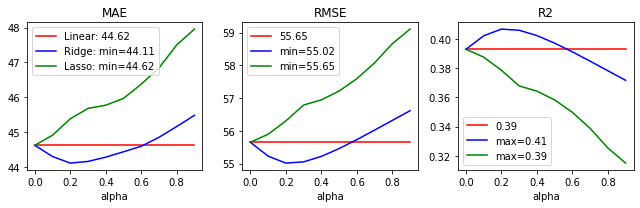

In [65]:
# Ridge, Lasso 라이브러리 로드
from sklearn.linear_model import Ridge, Lasso


# 데이터셋 로드
X = diabetes["data"]
y = diabetes["target"]
X_trn, X_test, y_trn, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# 평가 지표 계산 함수 정의
def get_metrics(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    r2 = r2_score(y_test, y_pred)
    
    return mae, rmse, r2


# 주어진 회귀 방법에 따른 평가 지표 계산 함수 정의
def get_metrics_list(X_trn, X_test, y_trn, y_test, regressor, regulation=True):
    maes, rmses, r2s = [], [], []
    alphas = list(np.arange(0, 1, 0.1, dtype="float"))    
    
    for a in alphas:
        if regulation:
            clf = regressor(alpha=a)
        else:
            clf = regressor()
            
        clf.fit(X_trn, y_trn)
        y_pred = clf.predict(X_test)


        mae, rmse, r2 = get_metrics(y_test, y_pred)
        maes.append(mae)
        rmses.append(rmse)
        r2s.append(r2)            
    
    return alphas, maes, rmses, r2s


# 회귀 모델 학습
alphas, maes_lr, rmses_lr, r2s_lr = get_metrics_list(X_trn, X_test, y_trn, y_test, LinearRegression, regulation=False)
alphas, maes_rg, rmses_rg, r2s_rg = get_metrics_list(X_trn, X_test, y_trn, y_test, Ridge, regulation=True)
alphas, maes_ls, rmses_ls, r2s_ls = get_metrics_list(X_trn, X_test, y_trn, y_test, Lasso, regulation=True)


# 결과 시각화
fig, axs = plt.subplots(ncols=3, figsize=(9, 3))
axs[0].plot(alphas, maes_lr, c="r", label=f"Linear: {maes_lr[0]:0.2f}")
axs[0].plot(alphas, maes_rg, c="b", label=f"Ridge: min={min(maes_rg):0.2f}")
axs[0].plot(alphas, maes_ls, c="g", label=f"Lasso: min={min(maes_ls):0.2f}")
axs[0].set_title("MAE")
axs[0].set_xlabel("alpha")
axs[0].legend()
axs[1].plot(alphas, rmses_lr, c="r", label=f"{rmses_lr[0]:0.2f}")
axs[1].plot(alphas, rmses_rg, c="b", label=f"min={min(rmses_rg):0.2f}")
axs[1].plot(alphas, rmses_ls, c="g", label=f"min={min(rmses_ls):0.2f}")
axs[1].set_title("RMSE")
axs[1].set_xlabel("alpha")
axs[1].legend()
axs[2].plot(alphas, r2s_lr, c="r", label=f"{r2s_lr[0]:0.2f}")
axs[2].plot(alphas, r2s_rg, c="b", label=f"max={max(r2s_rg):0.2f}")
axs[2].plot(alphas, r2s_ls, c="g", label=f"max={max(r2s_ls):0.2f}")
axs[2].set_title("R2")
axs[2].set_xlabel("alpha")
axs[2].legend()
fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 437938.4470301845, tolerance: 194.25105695792882
  positive)


metrics           MAE (min)         RMSE (min)         R2 (max)       
state                 as is  scaled      as is  scaled    as is scaled
Linear Regression    44.618  44.754     55.652  55.763    0.393  0.390
Ridge                44.107  44.569     55.015  55.340    0.407  0.400
Lasso                44.618  44.754     55.652  55.568    0.393  0.395

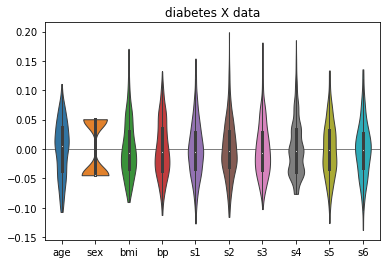

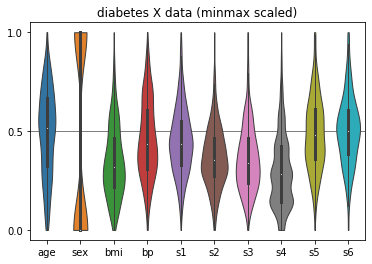

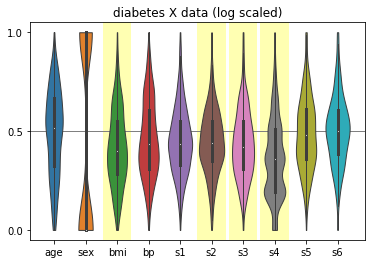

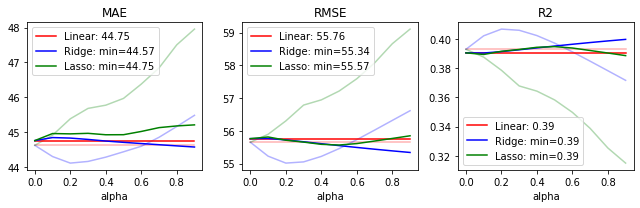

In [80]:
# 5번 : Feature Scaling
#인자들의 값이나 범위가 들쭉날쭉하면 회귀식의 계수도 편차가 커집니다.
#자연히 예측 성능이 좋기가 어렵고, Regularization에 의해 학습 성능이 떨어지기도 합니다.
#인자들의 범위를 비슷하게 맞추고 분포를 정규분포에 맞추어 줌으로써 성능을 향상시킬 수 있습니다.
#인자들의 범위를 맞춰주는 Scaler들을 사용해보고 성능을 비교하는 코드를 작성하세요.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import seaborn as sns
# 데이터 분포 시각화
X = diabetes["data"]
y = diabetes["target"]
fig, ax = plt.subplots()
sns.violinplot(data=X, cut=0, linewidth=1, ax=ax)
ax.axhline(0, c="gray", lw=1, zorder=0.1)
ax.set_xticklabels(diabetes["feature_names"])
ax.set_title("diabetes X data")
fig.savefig('파일1 이름')

# 데이터 변환 함수
def get_transformed(data, method):
    if method != "log":
        if method == "minmax":
            scaler = MinMaxScaler()
        elif method == "standard":
            scaler = StandardScaler()
        else:
            scaler = RobustScaler()
        transformed = scaler.fit_transform(data)
    elif method == "log":
        transformed = np.log1p(data)/np.log1p(1)
    '''
    code here

			TO-DO : 
					1. method에 "log"를 넣으면 np.log1p(data)/np.log1p(1)
					2. method에 "minmax"를 넣으면 MinMaxScaler
					3. method에 "standard"를 넣으면 StandardScaler
					4. method에 "robust"를 넣으면 RobustScaler
    '''

    return transformed

# 데이터 변환 후 시각화
X_transformed = get_transformed(X, "minmax")
fig, ax = plt.subplots()
v = sns.violinplot(data=X_transformed, cut=0, linewidth=1, ax=ax)
ax.set_title("diabetes X data (minmax scaled)")
ax.set_xticklabels(diabetes["feature_names"])
ax.set_yticks([0, 0.5, 1])
ax.axhline(0.5, c="gray", lw=1, zorder=0.1)
fig.savefig('파일2 이름')

for idx in [2, 5, 6, 7]:
    transformed = get_transformed(X_transformed[:, idx].reshape(-1, 1), "log")
    X_transformed[:, idx] = transformed.flatten()
fig, ax = plt.subplots()
sns.violinplot(data=X_transformed, cut=0, linewidth=1, ax=ax)
ax.axhline(0.5, c="gray", lw=1, zorder=0.1)
ylim = ax.get_ylim()

for idx in [2, 5, 6, 7]:
    ax.axvspan(idx-0.45, idx+0.45, ylim[0], ylim[1], fc="yellow", zorder=0.1, alpha=0.3)
ax.set_xticklabels(diabetes["feature_names"])
ax.set_yticks([0, 0.5, 1])
ax.set_title("diabetes X data (log scaled)")
fig.savefig('파일3 이름')

# 변환된 데이터 train-test split
X_trn, X_test, y_trn, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=0)

# 학습 결과 계산
alphas, maes_lr_scale, rmses_lr_scale, r2s_lr_scale = get_metrics_list(X_trn, X_test, y_trn, y_test, LinearRegression, regulation=False)
alphas, maes_rg_scale, rmses_rg_scale, r2s_rg_scale = get_metrics_list(X_trn, X_test, y_trn, y_test, Ridge, regulation=True)
alphas, maes_ls_scale, rmses_ls_scale, r2s_ls_scale = get_metrics_list(X_trn, X_test, y_trn, y_test, Lasso, regulation=True)

# 결과 시각화
fig, axs = plt.subplots(ncols=3, figsize=(9, 3))

def plot_metric(alphas, metric1, metric2, metric3, metric1_scale, metric2_scale, metric3_scale, title, ax):
    ax.plot(alphas, metric1, c="r", alpha=0.3)
    ax.plot(alphas, metric2, c="b", alpha=0.3)
    ax.plot(alphas, metric3, c="g", alpha=0.3)
    ax.plot(alphas, metric1_scale, c="r", label=f"Linear: {metric1_scale[0]:0.2f}")
    ax.plot(alphas, metric2_scale, c="b", label=f"Ridge: min={min(metric2_scale):0.2f}")
    ax.plot(alphas, metric3_scale, c="g", label=f"Lasso: min={min(metric3_scale):0.2f}")
    ax.set_title(title)
    ax.set_xlabel("alpha")
    ax.legend()    
    return ax

axs[0] = plot_metric(alphas, maes_lr, maes_rg, maes_ls, maes_lr_scale, maes_rg_scale, maes_ls_scale, "MAE", axs[0])    
axs[1] = plot_metric(alphas, rmses_lr, rmses_rg, rmses_ls, rmses_lr_scale, rmses_rg_scale, rmses_ls_scale, "RMSE", axs[1])
axs[2] = plot_metric(alphas, r2s_lr, r2s_rg, r2s_ls, r2s_lr_scale, r2s_rg_scale, r2s_ls_scale, "R2", axs[2])

fig.tight_layout()
fig.savefig('파일4 이름')
iterables = [["MAE (min)", "RMSE (min)", "R2 (max)"], ["as is", "scaled"]]
columns = pd.MultiIndex.from_product(iterables, names=["metrics", "state"])
data = [[min(maes_lr), min(maes_lr_scale), min(rmses_lr), min(rmses_lr_scale), max(r2s_lr), max(r2s_lr_scale)],
        [min(maes_rg), min(maes_rg_scale), min(rmses_rg), min(rmses_rg_scale), max(r2s_rg), max(r2s_rg_scale)],
        [min(maes_ls), min(maes_ls_scale), min(rmses_ls), min(rmses_ls_scale), max(r2s_ls), max(r2s_ls_scale)]]
df_summary = pd.DataFrame(index = ["Linear Regression", "Ridge", "Lasso"],
                          columns = columns,
                          data = data).applymap(lambda x: f"{x:0.3f}")
display(df_summary)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 437938.4470301845, tolerance: 194.25105695792882
  positive)


metrics           MAE (min)         RMSE (min)         R2 (max)       
state                 as is  scaled      as is  scaled    as is scaled
Linear Regression    44.618  44.754     55.652  55.763    0.393  0.390
Ridge                44.107  44.569     55.015  55.340    0.407  0.400
Lasso                44.618  44.754     55.652  55.568    0.393  0.395

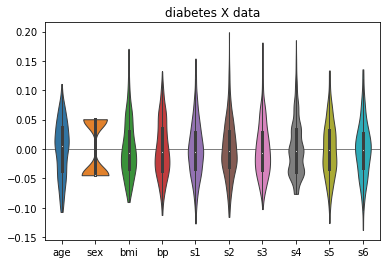

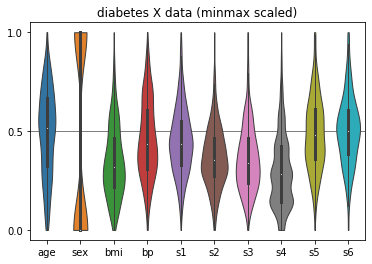

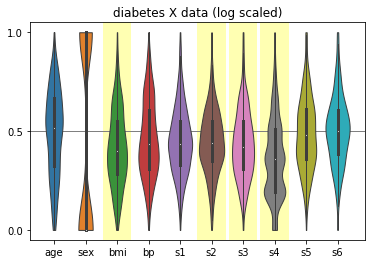

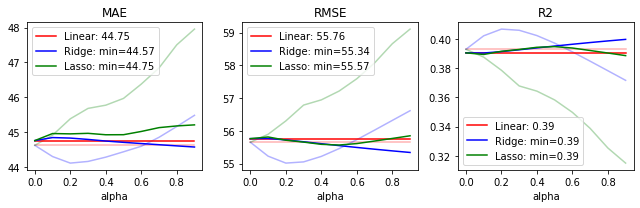

In [82]:
import seaborn as sns


# Scaler 라이브러리 로드
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


# 데이터 분포 시각화
X = diabetes["data"]
y = diabetes["target"]
fig, ax = plt.subplots()
sns.violinplot(data=X, cut=0, linewidth=1, ax=ax)
ax.axhline(0, c="gray", lw=1, zorder=0.1)
ax.set_xticklabels(diabetes["feature_names"])
ax.set_title("diabetes X data")
#fig.savefig('./data/diabetes X data.png')


# 데이터 변환 함수
def get_transformed(data, method):
    
    if method == 'log':
        transformed = np.log1p(data)/np.log1p(1)
    elif method == 'minmax':
        scaler = MinMaxScaler()
        transformed = scaler.fit_transform(data)
    elif method == 'standard':
        scaler = StandardScaler()
        transformed = scaler.fit_transform(data)
    elif method == 'robust':
        scaler = RobustScaler()
        transformed = scaler.fit_transform(data)


    return transformed


# 데이터 변환 후 시각화
X_transformed = get_transformed(X, "minmax")
fig, ax = plt.subplots()
v = sns.violinplot(data=X_transformed, cut=0, linewidth=1, ax=ax)
ax.set_title("diabetes X data (minmax scaled)")
ax.set_xticklabels(diabetes["feature_names"])
ax.set_yticks([0, 0.5, 1])
ax.axhline(0.5, c="gray", lw=1, zorder=0.1)
#fig.savefig('./data/X_transformed.png')


for idx in [2, 5, 6, 7]:
    transformed = get_transformed(X_transformed[:, idx].reshape(-1, 1), "log")
    X_transformed[:, idx] = transformed.flatten()
fig, ax = plt.subplots()
sns.violinplot(data=X_transformed, cut=0, linewidth=1, ax=ax)
ax.axhline(0.5, c="gray", lw=1, zorder=0.1)
ylim = ax.get_ylim()


for idx in [2, 5, 6, 7]:
    ax.axvspan(idx-0.45, idx+0.45, ylim[0], ylim[1], fc="yellow", zorder=0.1, alpha=0.3)
ax.set_xticklabels(diabetes["feature_names"])
ax.set_yticks([0, 0.5, 1])
ax.set_title("diabetes X data (log scaled)")
#fig.savefig('./data/diabetes X data (log scaled).png')


# 변환된 데이터 train-test split
X_trn, X_test, y_trn, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=0)


# 학습 결과 계산
alphas, maes_lr_scale, rmses_lr_scale, r2s_lr_scale = get_metrics_list(X_trn, X_test, y_trn, y_test, LinearRegression, regulation=False)
alphas, maes_rg_scale, rmses_rg_scale, r2s_rg_scale = get_metrics_list(X_trn, X_test, y_trn, y_test, Ridge, regulation=True)
alphas, maes_ls_scale, rmses_ls_scale, r2s_ls_scale = get_metrics_list(X_trn, X_test, y_trn, y_test, Lasso, regulation=True)


# 결과 시각화
fig, axs = plt.subplots(ncols=3, figsize=(9, 3))


def plot_metric(alphas, metric1, metric2, metric3, metric1_scale, metric2_scale, metric3_scale, title, ax):
    ax.plot(alphas, metric1, c="r", alpha=0.3)
    ax.plot(alphas, metric2, c="b", alpha=0.3)
    ax.plot(alphas, metric3, c="g", alpha=0.3)
    ax.plot(alphas, metric1_scale, c="r", label=f"Linear: {metric1_scale[0]:0.2f}")
    ax.plot(alphas, metric2_scale, c="b", label=f"Ridge: min={min(metric2_scale):0.2f}")
    ax.plot(alphas, metric3_scale, c="g", label=f"Lasso: min={min(metric3_scale):0.2f}")
    ax.set_title(title)
    ax.set_xlabel("alpha")
    ax.legend()    
    return ax


axs[0] = plot_metric(alphas, maes_lr, maes_rg, maes_ls, maes_lr_scale, maes_rg_scale, maes_ls_scale, "MAE", axs[0])    
axs[1] = plot_metric(alphas, rmses_lr, rmses_rg, rmses_ls, rmses_lr_scale, rmses_rg_scale, rmses_ls_scale, "RMSE", axs[1])
axs[2] = plot_metric(alphas, r2s_lr, r2s_rg, r2s_ls, r2s_lr_scale, r2s_rg_scale, r2s_ls_scale, "R2", axs[2])


fig.tight_layout()
#fig.savefig('./data/diabetes final.png')
iterables = [["MAE (min)", "RMSE (min)", "R2 (max)"], ["as is", "scaled"]]
columns = pd.MultiIndex.from_product(iterables, names=["metrics", "state"])
data = [[min(maes_lr), min(maes_lr_scale), min(rmses_lr), min(rmses_lr_scale), max(r2s_lr), max(r2s_lr_scale)],
        [min(maes_rg), min(maes_rg_scale), min(rmses_rg), min(rmses_rg_scale), max(r2s_rg), max(r2s_rg_scale)],
        [min(maes_ls), min(maes_ls_scale), min(rmses_ls), min(rmses_ls_scale), max(r2s_ls), max(r2s_ls_scale)]]
df_summary = pd.DataFrame(index = ["Linear Regression", "Ridge", "Lasso"],
                          columns = columns,
                          data = data).applymap(lambda x: f"{x:0.3f}")
display(df_summary)


,LinearRegression,Ridge,Lasso
age,-14.747256,-11.873146,-0.000000
sex,-18.967234,-18.898930,-14.376036
bmi,141.749073,134.428508,137.301006
bp,67.424002,66.926715,53.611534
s1,-144.413836,-27.044025,-16.685375
s2,68.654972,-25.102339,-0.000000
s3,-11.521999,-57.359376,-61.016588
s4,29.902434,23.891562,0.000000
s5,186.290238,131.260430,136.295038
s6,8.681987,14.141867,0.000000


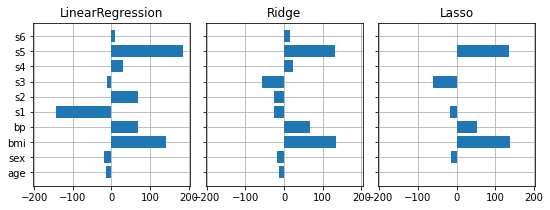

In [98]:
# 6번 : Coefficients
# 선형 모델에서는 각 항의 계수로 인자 중요도를 가늠할 수 있습니다. 이 때 각 데이터의 범위가 다르다면 계수가 크게 다를 수 있으니 유의합시다.
# 직전 문제에서 다룬 알고리즘 별 최적의 결과를 도출한 alpha를 추출합니다.
# 추출한 alpha를 기준으로 계수를 계산하는 코드를 작성하세요.
# code from 4, 5번

# Ridge, Lasso에서 alpha 추출
alpha_rg_best = alphas[np.argmax(r2s_rg_scale)]
alpha_ls_best = alphas[np.argmax(r2s_ls_scale)]

# 주어진 regressor의 계수 출력
def get_pred_coef(X_trn, y_trn, X_test, regressor, alpha=None):
    if alpha == None:
        reg = regressor()
    else:
        reg = regressor(alpha=alpha)
    reg.fit(X_trn, y_trn)
    y_pred = reg.predict(X_test)
    return pd.DataFrame(data = reg.coef_,
                        columns = [str(regressor).split("'")[-2].split(".")[-1]],
                        index = diabetes["feature_names"])

# 결과 출력을 위한 DataFrame 생성
models = [LinearRegression, Ridge, Lasso]
alphas_best = [None,alpha_rg_best, alpha_ls_best]

df_coef = pd.DataFrame()
for model, alpha in zip(models, alphas_best):
    df_coef_ = get_pred_coef(X_trn, y_trn,X_test, model, alpha)
    df_coef = pd.concat([df_coef, df_coef_], axis=1)

# 결과 시각화
display(df_coef)
fig, axs = plt.subplots(ncols=3, figsize=(9, 3), 
                        sharex=True, sharey=True,
                        gridspec_kw={'wspace':0.1})
for ax, col in zip(axs, df_coef.columns):
    ax.barh(df_coef.index, df_coef[col], zorder=2)
    ax.grid()
    ax.set_title(col)
xlim = max([abs(x) for x in axs[0].get_xlim()])
axs[0].set_xlim(-xlim, xlim)
fig.savefig('파일 이름')

In [103]:
# 7번 : XGBoost, LightGBM
#앙상블 모델들을 이용해서 예측해봅시다. 분류 문제에 적용했던 랜덤 포레스트 외에도 XGBoost, LightGBM 등이 널리 활용되고 있습니다.
#랜덤 포레스트, XGBoost, LightGBM은 회귀 문제 뿐 아니라 분류에도 적용할 수 있습니다.
#Random Forest, XGBoost, LightGBM을 기본 설정으로 실행해보고, RandomizedSearchCV로 하이퍼 파라미터를 최적화한 결과도 함께 실행해 보세요.
# ensemble 모델 Regression 라이브러리 로드
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats.distributions as dists

# 결과 지표 계산 함수
def get_metrics(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    r2 = r2_score(y_test, y_pred)
    
    return mae, rmse, r2

# RandomForest 학습
rf_clf = RandomForestRegressor()
rf_clf.fit(X_trn,y_trn)
y_pred = rf_clf.predict(X_test)

# Random Forest 결과 출력
mae_rf0, rmse_rf0, r2_rf0 = get_metrics(y_test, y_pred)
print(f"# Random Forest (as is)")
print(f"  mae  = {mae_rf0:0.3f}")
print(f"  rmse = {rmse_rf0:0.3f}")
print(f"  r2   = {r2_rf0:0.3f}")

# Random Forest Hyper-parameter Optimization
pars = {"n_estimators": list(range(100, 1100, 100)),
        "max_depth": dists.randint(1, 20 + 1), 
        "max_features": ['auto', 'sqrt'],
        "min_samples_split":dists.randint(2, 5 + 1), 
        "random_state": [0]}
clf_rf = RandomizedSearchCV(rf_clf,param_distributions=pars)
clf_rf.fit(X_trn,y_trn)
y_pred = clf_rf.predict(X_test)
r2_cv_rf1 = r2_score(y_test, y_pred)

# Random Forest 결과 출력
mae_rf1, rmse_rf1, r2_rf1 = get_metrics(y_test, y_pred)
print(f"# Random Forest (Random CV)")
print(f"  mae  (pred) = {mae_rf1:0.3f}")
print(f"  rmse (pred) = {rmse_rf1:0.3f}")
print(f"  r2   (pred) = {r2_rf1:0.3f}")
#print(f"  r2     (cv) = {r2_cv_rf1:0.3f}")

# XGBoost 학습
xgb_clf = XGBRegressor()
xgb_clf.fit(X_trn,y_trn)
y_pred = xgb_clf.predict(X_test)

# XGBoost 학습 결과 출력
mae_xg0, rmse_xg0, r2_xg0 = get_metrics(y_test, y_pred)
print(f"# XGBoost (as is)")
print(f"  mae  = {mae_xg0:0.3f}")
print(f"  rmse = {rmse_xg0:0.3f}")
print(f"  r2   = {r2_xg0:0.3f}")

# XGBoost Hyper-parameter Optimization
pars = {"n_estimators": list(range(100, 1100, 100)),
        "max_depth": dists.randint(1, 20 + 1), 
        "max_features": ['auto', 'sqrt'],
        "min_samples_split":dists.randint(2, 5 + 1), 
        "random_state": [0]}
clf_xgb = RandomizedSearchCV(xgb_clf,param_distributions=pars)
clf_xgb.fit(X_trn,y_trn)
y_pred = clf_xgb.predict(X_test)
r2_cv_xg1 = r2_score(y_test, y_pred)

# XGBoost 학습 결과 출력
mae_xg1, rmse_xg1, r2_xg1 = get_metrics(y_test, y_pred)
print(f"# XGBoost (Random CV)")
print(f"  mae  (pred) = {mae_xg1:0.3f}")
print(f"  rmse (pred) = {rmse_xg1:0.3f}")
print(f"  r2   (pred) = {r2_xg1:0.3f}")
#print(f"  r2     (cv) = {r2_cv_xg1:0.3f}")

# LightGBM 학습

lgb_clf = LGBMRegressor()
lgb_clf.fit(X_trn,y_trn)
y_pred = lgb_clf.predict(X_test)

# LightGBM 학습 결과 출력
mae_lb0, rmse_lb0, r2_lb0 = get_metrics(y_test, y_pred)
print(f"# XGBoost (as is)")
print(f"  mae  = {mae_lb0:0.3f}")
print(f"  rmse = {rmse_lb0:0.3f}")
print(f"  r2   = {r2_lb0:0.3f}")

# LightGBM Hyper-parameter Optimization
pars = {"n_estimators": list(range(100, 1100, 100)),
        "max_depth": dists.randint(1, 20 + 1), 
        "max_features": ['auto', 'sqrt'],
        "min_samples_split":dists.randint(2, 5 + 1), 
        "random_state": [0]}
clf_lgb = RandomizedSearchCV(lgb_clf,param_distributions=pars)
clf_lgb.fit(X_trn,y_trn)
y_pred = clf_lgb.predict(X_test)
r2_cv_lb1 = r2_score(y_test, y_pred)

# LightGBM 학습 결과 출력
mae_lb1, rmse_lb1, r2_lb1 = get_metrics(y_test, y_pred)
print(f"# XGBoost (Random CV)")
print(f"  mae  (pred) = {mae_lb1:0.3f}")
print(f"  rmse (pred) = {rmse_lb1:0.3f}")
print(f"  r2   (pred) = {r2_lb1:0.3f}")
#print(f"  r2     (cv) = {r2_cv_lb1:0.3f}")

# 전체 결과 요약 출력
iterables = [["MAE (min)", "RMSE (min)", "R2 (max)"], ["as is", "scaled"]]
columns = pd.MultiIndex.from_product(iterables, names=["metric", "state"])
data = [[np.nan, mae_rf1, np.nan, rmse_rf1, np.nan, r2_rf1],
        [np.nan, mae_xg1, np.nan, rmse_xg1, np.nan, r2_xg1],
        [np.nan, mae_lb1, np.nan, rmse_lb1, np.nan, r2_lb1]]
df_ensemble = pd.DataFrame(index = ["Random Forest", "XGBoost", "LightGBM"],
                          columns = columns,
                          data = data).applymap(lambda x: f"{x:0.3f}")
df_summary = pd.concat([df_summary, df_ensemble], axis=0)
display(df_summary)



# Random Forest (as is)
  mae  = 47.499
  rmse = 59.446
  r2   = 0.307
# Random Forest (Random CV)
  mae  (pred) = 46.010
  rmse (pred) = 57.786
  r2   (pred) = 0.345
[13:44:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
# XGBoost (as is)
  mae  = 47.841
  rmse = 60.005
  r2   = 0.294
[13:44:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44

metrics           MAE (min)         RMSE (min)         R2 (max)       
state                 as is  scaled      as is  scaled    as is scaled
Linear Regression    44.618  44.754     55.652  55.763    0.393  0.390
Ridge                44.107  44.569     55.015  55.340    0.407  0.400
Lasso                44.618  44.754     55.652  55.568    0.393  0.395
Random Forest           nan  46.010        nan  57.786      nan  0.345
XGBoost                 nan  47.841        nan  60.005      nan  0.294
LightGBM                nan  48.234        nan  61.559      nan  0.257

[14:01:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


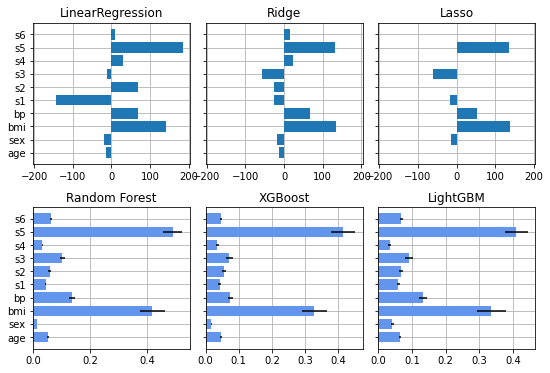

In [110]:
# 8번 : Permutation Importance
# 회귀에 사용된 인자들에는 경중이 있습니다. 인자들 중에는 회귀에 매우 중요한 인자도 있고, 잡음으로 작용하는 인자도 있습니다.
# 인자 중요도는 feature_importances_ 로 알아낼 수 있지만 신뢰도가 높지 않습니다.
# 순열 중요도(permutation_importance)를 사용하여 이전 문제에서 사용한 Random Forest, XGBoost, LightGBM의 정확한 영향력을 파악하는 코드를 작성하세요.
# Tree-based Model 들의 permutation importance를 계산하는 라이브러리 로드
from sklearn.inspection import permutation_importance

# Permutation Importance의 평균, 표준편차 계산
def get_pi(regressor):
    pi_mean = permutation_importance(regressor,X_trn,y_trn,n_repeats=10,random_state=42).importances_mean
    pi_std = permutation_importance(regressor,X_trn,y_trn,n_repeats=10,random_state=42).importances_std
    return pi_mean, pi_std

# 결과 시각화
rcv_rf1 = RandomForestRegressor()
rcv_rf1.fit(X_trn,y_trn)
rcv_xg1 = XGBRegressor()
rcv_xg1.fit(X_trn,y_trn)
rcv_lb1 = LGBMRegressor()
rcv_lb1.fit(X_trn,y_trn)
pi_mean_rf1, pi_std_rf1 = get_pi(rcv_rf1)
pi_mean_xg1, pi_std_xg1 = get_pi(rcv_xg1)
pi_mean_lb1, pi_std_lb1 = get_pi(rcv_lb1)
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(9, 6), 
                        sharex=False, sharey=True,
                        gridspec_kw={"wspace":0.1, "hspace":0.3})
axs = axes.ravel()
xlim0 = 0
for ax, col in zip(axs[:3], df_coef.columns):
    ax.barh(df_coef.index, df_coef[col], zorder=2)
    ax.grid()
    ax.set_title(col)
    xlim = max([abs(x) for x in ax.get_xlim()])
    xlim0 = max(xlim0, xlim)
for ax in axs[:3]:
    ax.set_xlim(-xlim0, xlim0)
pi_means = [pi_mean_rf1, pi_mean_xg1, pi_mean_lb1]
pi_stds = [pi_std_rf1, pi_std_xg1, pi_std_lb1]
methods = ["Random Forest", "XGBoost", "LightGBM"]
for ax, pi_mean, pi_std, method in zip(axs[3:], pi_means, pi_stds, methods):
    ax.barh(diabetes["feature_names"], pi_mean, xerr=pi_std, 
            fc="cornflowerblue", zorder=2)    
    ax.grid()
    ax.set_title(method)
    
fig.savefig('파일 이름')

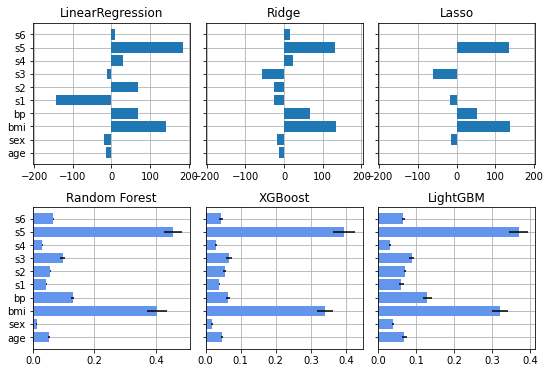

In [111]:
from sklearn.inspection import permutation_importance


# Permutation Importance의 평균, 표준편차 계산
def get_pi(regressor):
    results = permutation_importance(regressor, X_trn, y_trn)
    pi_mean, pi_std = results['importances_mean'], results['importances_std']


    return pi_mean, pi_std


# 결과 시각화
pi_mean_rf1, pi_std_rf1 = get_pi(rcv_rf1)
pi_mean_xg1, pi_std_xg1 = get_pi(rcv_xg1)
pi_mean_lb1, pi_std_lb1 = get_pi(rcv_lb1)
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(9, 6), 
                        sharex=False, sharey=True,
                        gridspec_kw={"wspace":0.1, "hspace":0.3})
axs = axes.ravel()
xlim0 = 0
for ax, col in zip(axs[:3], df_coef.columns):
    ax.barh(df_coef.index, df_coef[col], zorder=2)
    ax.grid()
    ax.set_title(col)
    xlim = max([abs(x) for x in ax.get_xlim()])
    xlim0 = max(xlim0, xlim)
for ax in axs[:3]:
    ax.set_xlim(-xlim0, xlim0)
pi_means = [pi_mean_rf1, pi_mean_xg1, pi_mean_lb1]
pi_stds = [pi_std_rf1, pi_std_xg1, pi_std_lb1]
methods = ["Random Forest", "XGBoost", "LightGBM"]
for ax, pi_mean, pi_std, method in zip(axs[3:], pi_means, pi_stds, methods):
    ax.barh(diabetes["feature_names"], pi_mean, xerr=pi_std, 
            fc="cornflowerblue", zorder=2)    
    ax.grid()
    ax.set_title(method)